> #### **”In God we trust. All others must bring data.”**📊😁
W. Edwards Deming<br/>


# CO<sub>2</sub> Emission Predictor
<br/> This simple project is meant to predict the CO2 emission for different cars, given their engine size, using linear reggression model.
<br/><br/>Author: Roya Parsaee

## Preprocessing

### Step 1 
   Load the dataset and select the required culumns.


In [1]:
import pandas as pd
import numpy as np
  
col_names = ['A', 'B', 'C', 'D','ENGINESIZE','E', 'F','G','H','I','J','K','CO2EMISSIONS']

data = pd.read_csv('FuelConsumptionCo2.csv', header=0, names=col_names) 
ENGINESIZE = data['ENGINESIZE']
CO2EMISSIONS = data['CO2EMISSIONS']

data = pd.DataFrame({'ENGINESIZE':ENGINESIZE, 'CO2EMISSIONS':CO2EMISSIONS})

print("Head of the raw data:")
print(data.head())
print("\n")
print("Description of the raw data:")
print(data.describe())


Head of the raw data:
   ENGINESIZE  CO2EMISSIONS
0         2.0           196
1         2.4           221
2         1.5           136
3         3.5           255
4         3.5           244


Description of the raw data:
        ENGINESIZE  CO2EMISSIONS
count  1067.000000   1067.000000
mean      3.346298    256.228679
std       1.415895     63.372304
min       1.000000    108.000000
25%       2.000000    207.000000
50%       3.400000    251.000000
75%       4.300000    294.000000
max       8.400000    488.000000


### Step 2
Normalise the data using minmaxscaler function.

In [2]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['ENGINESIZE', 'CO2EMISSIONS']
data[numerical] = scaler.fit_transform(data[numerical])

print("Head of the normalized data:")
print(data.head())
print("\n")
print("Description of the normalized data:")
print(data.describe())

Head of the normalized data:
   ENGINESIZE  CO2EMISSIONS
0    0.135135      0.231579
1    0.189189      0.297368
2    0.067568      0.073684
3    0.337838      0.386842
4    0.337838      0.357895


Description of the normalized data:
        ENGINESIZE  CO2EMISSIONS
count  1067.000000   1067.000000
mean      0.317067      0.390075
std       0.191337      0.166769
min       0.000000      0.000000
25%       0.135135      0.260526
50%       0.324324      0.376316
75%       0.445946      0.489474
max       1.000000      1.000000


## Visualizing the Normalized Data

Using matplotlib backend: <object object at 0x000002405C73D420>


<IPython.core.display.Javascript object>


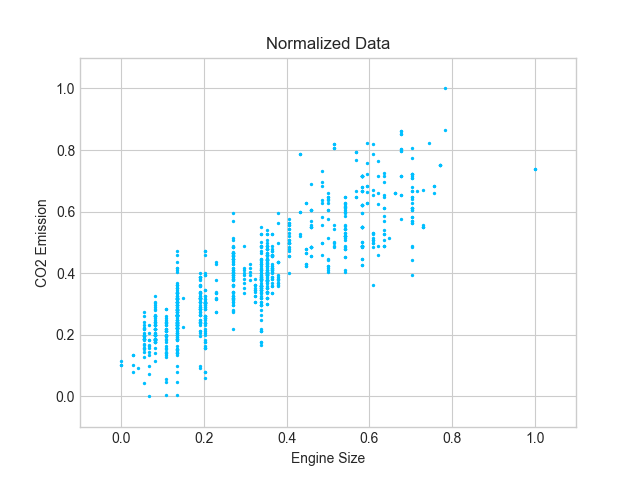

In [3]:
%matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
ax.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], c='#00BFFF', s=2)
ax.set(xlim = (-.1,1.1), ylim=(-.1,1.1), xlabel='Engine Size', ylabel='CO2 Emission', title='Normalized Data')

plt.draw()

## Training a Linear Regression Model and Making Predictions

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(data['ENGINESIZE'], data['CO2EMISSIONS'], test_size=0.2, random_state=42)
X_train=X_train.to_frame()
X_test=X_test.to_frame()

print("Train and Test Data Shapes:")
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print('\n')


model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_out = model.predict(X_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Validation Score (R Squared): %.2f" % r2_score(y_test, y_pred))
print("Training Score (R Squared): %.2f" % r2_score(y_train, y_out))


Train and Test Data Shapes:
x_train (853, 1)
y_train (853,)
x_test (214, 1)
y_test (214,)


Coefficients: [0.75933695]
Intercept: 0.15074389710137207
Mean squared error: 0.01
Validation Score (R Squared): 0.76
Training Score (R Squared): 0.76


## Visualizing the Results

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


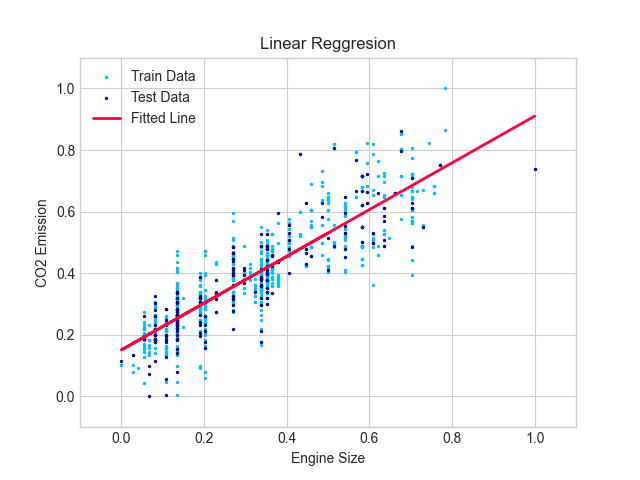

In [5]:
%matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
ax.scatter(X_train, y_train, c='#00BFFF', s=2, label='Train Data')
ax.scatter(X_test, y_test, c='#08088A', s=2, label='Test Data')
ax.plot(X_test, y_pred, color="#FF0040", linewidth=2, label='Fitted Line')

ax.set(xlim = (-.1,1.1), ylim=(-.1,1.1), xlabel='Engine Size', ylabel='CO2 Emission', title='Linear Reggresion');
ax.legend();
plt.draw();

## Removing the Duplicate Data


In [6]:
print("Number of duplicate rows:", sum(data.duplicated()))
unique_data = data.drop_duplicates(inplace = False)
print("Shape of the data after removing the duplicates: ", unique_data.shape)

Number of duplicate rows: 536
Shape of the data after removing the duplicates:  (531, 2)


## Training Model for the Data with No Duplicates

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(unique_data['ENGINESIZE'], unique_data['CO2EMISSIONS'], test_size=0.2, random_state=42)
X_train=X_train.to_frame()
X_test=X_test.to_frame()

print("Train and Test Data Shapes:")
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print('\n')

model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_out = model.predict(X_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Validation Score (R Squared): %.2f" % r2_score(y_test, y_pred))
print("Training Score (R Squared): %.2f" % r2_score(y_train, y_out))


Train and Test Data Shapes:
x_train (424, 1)
y_train (424,)
x_test (107, 1)
y_test (107,)


Coefficients: [0.77040346]
Intercept: 0.14092930722188735
Mean squared error: 0.01
Validation Score (R Squared): 0.73
Training Score (R Squared): 0.73


**The measures of Validation and Training score indicate that this model underfit the data; that is, it does not have enough model flexibility to suitably account for all the features in the data. Another way of saying this is that the model has high bias. Because the data are intrinsically moe complicated than a straight line, the linear regression model fails to describe this dataset well.**

   ## Finding the Best Model
   Let's see wheather the performance of our model improves if we use a polynomial, instead of linear reggression model to describe the data.

In [10]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LinearRegression(**kwargs))

X_train, X_test, y_train, y_test = train_test_split(data['ENGINESIZE'], data['CO2EMISSIONS'],
                                                    test_size=0.2, random_state=42)
X_train = X_train.to_frame()
X_test = X_test.to_frame()

print("Train and Test Data Shapes:")
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print('\n')


degrees = [3,5,7,9]
for degree in degrees:
    model = PolynomialRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_out = model.predict(X_train)

    print("Result for polynomial of degree {}:".format(degree))
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
    print("Validation Score (R Squared): %.2f" % r2_score(y_test, y_pred))
    print("Training Score (R Squared): %.2f" % r2_score(y_train, y_out))
    print("\n")


Train and Test Data Shapes:
x_train (853, 1)
y_train (853,)
x_test (214, 1)
y_test (214,)


Result for polynomial of degree 3:
Mean squared error: 0.01
Validation Score (R Squared): 0.77
Training Score (R Squared): 0.77


Result for polynomial of degree 5:
Mean squared error: 0.01
Validation Score (R Squared): 0.77
Training Score (R Squared): 0.77


Result for polynomial of degree 7:
Mean squared error: 0.01
Validation Score (R Squared): 0.77
Training Score (R Squared): 0.77


Result for polynomial of degree 9:
Mean squared error: 0.01
Validation Score (R Squared): 0.77
Training Score (R Squared): 0.77




Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


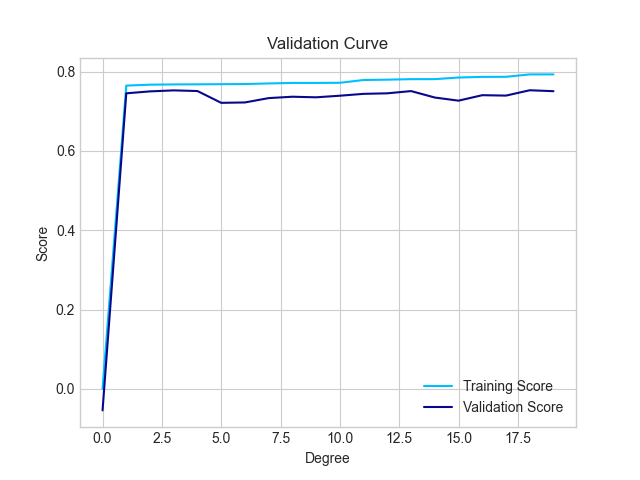

In [11]:
%matplotlib
%matplotlib notebook
from sklearn.model_selection import validation_curve, learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
ax = plt.axes()
X = data['ENGINESIZE'].to_frame()
y = data['CO2EMISSIONS'].to_frame()
degree = np.arange(0, 20)
train_score, val_score = validation_curve(PolynomialRegression(), X,y,param_name='polynomialfeatures__degree', 
                                          param_range=degree, cv=7)

ax.plot(degree, np.median(train_score, 1), c='#00BFFF', label='Training Score')
ax.plot(degree, np.median(val_score, 1), c='#08088A', label='Validation Score')

ax.set(xlabel='Degree', ylabel='Score', title='Validation Curve')
ax.legend()
plt.show()

**From the validation curve, we can read off that the optimal trade-off between bias and variance is found for a fourth-order polynomial.**